In [1]:
import pickle
import numpy as np
import pandas as pd 
from time import time

In [2]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
data_set=pd.read_csv('kc_house_data.csv')

In [9]:

data_set.drop(['id', 'date'], axis = 1, inplace = True)


In [10]:
data_set['basement_present'] = data_set['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) 
data_set['renovated'] = data_set['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) 


In [18]:
#data_set.head()
print ("Dimension of data_set:",data_set.shape)
Y=data_set.price
X=data_set.drop('price',axis=1)
#X=data_set.drop('date',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.30)
#print ("\nX_train:\n")
#print (X_train.head())
print ("Dimension of X_train:",X_train.shape)
#print ("\nX_test:\n")
#print (X_test.head())
print ("Dimension of X_test:",X_test.shape)


Dimension of data_set: (21613, 21)
Dimension of X_train: (15129, 20)
Dimension of X_test: (6484, 20)


In [20]:
from sklearn import linear_model
from time import time
from sklearn.metrics import r2_score
reg=linear_model.LinearRegression()
t0=time()
reg.fit(X_train,Y_train)
#reg.fit(X_train,X_train)
print ("Time:", round(time()-t0,8),"s")
pred=reg.predict(X_test)
print ("Accuracy:",round(r2_score(Y_test,pred),3))

Time: 0.01561999 s
Accuracy: 0.705


In [13]:
#from sklearn.metrics import mean_squared_error
#pred=reg.predict(X_test)
#RMSE = mean_squared_error(Y_test,reg.predict(X_test))**0.5
#RMSE = mean_squared_error(Y_test.as_matrix(columns = ['price']),reg.predict(Y_test.as_matrix(columns = ['sqft_living'])))**0.5

In [21]:
pred=reg.predict(X_test)
print(pred)

[411061.72177166 336972.15988632 394945.22928651 ... 362455.46674829
 599948.99142439 539682.68377605]


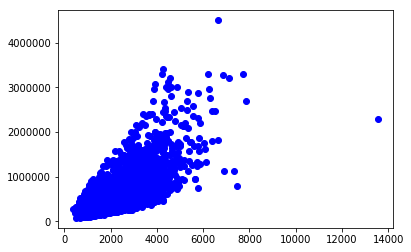

In [22]:
from matplotlib import pyplot as plt
plt.scatter(X_test['sqft_living'],Y_test,c='b',marker='o')

plt.show()
